In [38]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# Importing NumPy library for numerical operations
import numpy as np
# Importing Pandas library for data manipulation and analysis
import pandas as pd
# Importing visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Reading the CSV file into a DataFrame called 'dfgames' using the read_csv() function
dfgames = pd.read_csv("/content/drive/MyDrive/nba_reb_proj/games.csv")

In [41]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

**Objectives**:

a)In this analysis, we'll explore how factors beyond shooting impact winning outcomes in the NBA. We'll examine the home-court advantage, as well as rebounding and assist totals, to see how they influence game results.

b)Additionally, we'll investigate potential correlations between point, rebound and assists differential between teams.

c)Finally, we'll analyze how these factors, points, rebounds, and assists, have changed within the NBA over the past two decades.



In [42]:
#create a new dataframe with the columns we need for our analysis
df=  pd.DataFrame(dfgames[["SEASON","PTS_home","PTS_away","HOME_TEAM_WINS","REB_home","REB_away","AST_home","AST_away"]])
df = df.dropna()

In [44]:
df["PTS_dif"] = df["PTS_home"] - df["PTS_away"] #calculate the point differential,positive value means more points for the home team, negative value means more points for the away team
df["REB_dif"] = df["REB_home"] - df["REB_away"] #calculate the rebound differential,positive value means more rebounds for the home team, negative value means more rebound for the away team
df["AST_dif"] = df["AST_home"] - df["AST_away"] #calculate the assist differential,positive value means more assists for the home team, negative value means more assist for the away team

df['REB_win'] = 0  #create a new column that will get the value "1" if the the winning team had more rebounds or 0 if it had less rebounds
df['REB_win'] = df['REB_win'].mask((df['REB_dif'] >= 0) & (df['PTS_dif'] > 0), 1).mask((df['REB_dif'] < 0) & (df['PTS_dif'] < 0), 1)

df['AST_win'] = 0  #create a new column that will get the value "1" if the the winning team had more assists or 0 if it had less assists
df['AST_win'] = df['AST_win'].mask((df['AST_dif'] >= 0) & (df['PTS_dif'] > 0), 1).mask((df['AST_dif'] < 0) & (df['PTS_dif'] < 0), 1)

df["PTS_total"] = df["PTS_home"] + df["PTS_away"]
df["AST_total"] = df["AST_home"] + df["AST_away"]
df["REB_total"] = df["REB_home"] + df["REB_away"]

#create a new order for my columns
new_order = ["SEASON","PTS_home","PTS_away","PTS_dif","PTS_total","REB_home","REB_away","REB_dif","REB_win","REB_total","AST_home","AST_away","AST_dif","AST_win","AST_total","HOME_TEAM_WINS"]
df =df[new_order]

In [45]:
df.head()

,SEASON,PTS_home,PTS_away,PTS_dif,PTS_total,REB_home,REB_away,REB_dif,REB_win,REB_total,AST_home,AST_away,AST_dif,AST_win,AST_total,HOME_TEAM_WINS
0,2022,126.0,117.0,9.0,243.0,46.0,44.0,2.0,1,90.0,25.0,23.0,2.0,1,48.0,1
1,2022,120.0,112.0,8.0,232.0,40.0,37.0,3.0,1,77.0,16.0,20.0,-4.0,0,36.0,1
2,2022,114.0,106.0,8.0,220.0,37.0,46.0,-9.0,0,83.0,22.0,20.0,2.0,1,42.0,1
3,2022,113.0,93.0,20.0,206.0,49.0,46.0,3.0,1,95.0,27.0,15.0,12.0,1,42.0,1
4,2022,108.0,110.0,-2.0,218.0,47.0,47.0,0.0,0,94.0,22.0,20.0,2.0,0,42.0,0


We'll create a new DataFrame containing only these specific columns:

"**HOME_TEAM_WINS**" (1 for home team winning, 0 for away team winning)

**REB_win** Team with more rebounds (1 for the winning team, 0 for the loosing team)

**AST_win** Team with more assists (1 for the winning team, 0 for the loosing team)

For each of six scenarios we'll calculate the following:

Number of games that fit the scenario

Percentage of games that fit the scenario

In [46]:
df_wins=pd.DataFrame(df[["HOME_TEAM_WINS","REB_win","AST_win"]])
for x in df_wins:
  cnts = df_wins[x].value_counts()
  perc = df_wins[x].value_counts(normalize=True) * 100
  print(f'{cnts} {perc}\n')

HOME_TEAM_WINS
1    15645
0    10907
Name: count, dtype: int64 HOME_TEAM_WINS
1    58.922115
0    41.077885
Name: proportion, dtype: float64

REB_win
1    17528
0     9024
Name: count, dtype: int64 REB_win
1    66.01386
0    33.98614
Name: proportion, dtype: float64

AST_win
1    18728
0     7824
Name: count, dtype: int64 AST_win
1    70.533293
0    29.466707
Name: proportion, dtype: float64



The data clearly reveals a trend: teams with more assists tend to win more games. Teams with more rebounds also see higher win rates, followed by teams that play at home. Let's visualize these results to gain deeper insights.

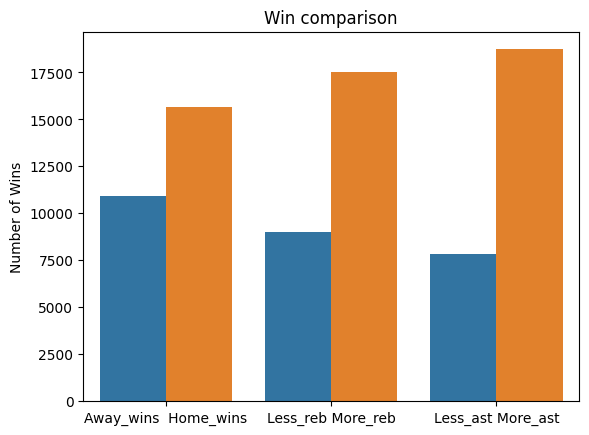

In [47]:
sns.countplot(data=pd.melt(df_wins),hue="value",x="variable", legend=False)
plt.ylabel('Number of Wins')
plt.xlabel('')
plt.title('Win comparison')
pos2 = [0,1,2]
wins2 = ['Away_wins  Home_wins','Less_reb More_reb','Less_ast More_ast']
plt.xticks(pos2, wins2)
plt.show()

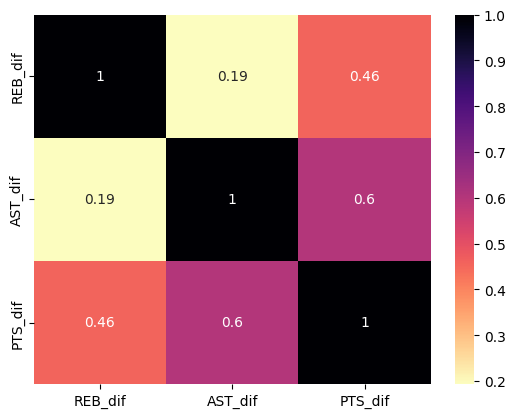

In [48]:
corr = df[["REB_dif","AST_dif","PTS_dif",]].corr()
sns.heatmap(corr,annot=True,cmap="magma_r")
plt.show()

The analysis reveals a moderate positive correlation (0.60) between assist differential and point differential. While this suggests a trend, it's not definitive. We can expect exceptions and outliers in the data. Similarly, the correlation (0.46) between point differential and rebound differential is weaker, implying a less pronounced trend and potentially more exceptions and outliers.



In [49]:
#create a model for linear regression just for fun so we can try to predict
#the point differencial if we know rebound and assist differencial

from sklearn import linear_model

X = df[["REB_dif","AST_dif"]]
y = df["PTS_dif"]

regr = linear_model.LinearRegression()
regr.fit(X.values, y)


LinearRegression()

In [50]:
#what the point difference will be  if the home team has 5 more rebounds and 5 less assists
predicted_pts_diff = regr.predict([[5,-5]])
if predicted_pts_diff >=0:
  print(f"we predict that the home team wins with {predicted_pts_diff} point difference")
else:
  print(f"we predict that the away team wins with {-1*predicted_pts_diff} point difference")

we predict that the away team wins with [1.9332139] point difference


We create a new dataframe with the average points, rebounds and assists for every season

In [52]:
AVG_df = pd.DataFrame(df.groupby("SEASON")["PTS_total"].mean())
AVG_df["AST_AVG"] = df.groupby("SEASON")["AST_total"].mean()
AVG_df["REB_AVG"] = df.groupby("SEASON")["REB_total"].mean()
AVG_df = AVG_df.rename(columns={"PTS_total": "PTS_AVG"}) #change the name of the column to PTS_AVG

In [53]:
AVG_df

,PTS_AVG,AST_AVG,REB_AVG
SEASON,,,
2003,186.000000,42.318818,84.414463
2004,193.986784,42.168869,83.533040
2005,193.578911,40.842179,81.771648
2006,196.793517,42.228330,82.052149
2007,198.822821,43.075833,83.849043
2008,198.826667,41.590175,82.490526
2009,200.400281,42.144663,83.236657
2010,198.141350,42.509142,82.769339
2011,191.821558,41.495471,84.281703


In [54]:
#checking what is the percentage increase on points, rebounds and assists
for x in AVG_df:
  print(f'there is {round(100*(AVG_df[x].iloc[19]/AVG_df[x].iloc[0]-1),2)}% increase in {x}')

there is 21.25% increase in PTS_AVG
there is 17.0% increase in AST_AVG
there is 4.06% increase in REB_AVG


Our analysis reveals a notable rise in both points and assists averaged per game, alongside a modest increase in rebounds per game. Let's visualize these trends through the course of our 20-year data using plots.

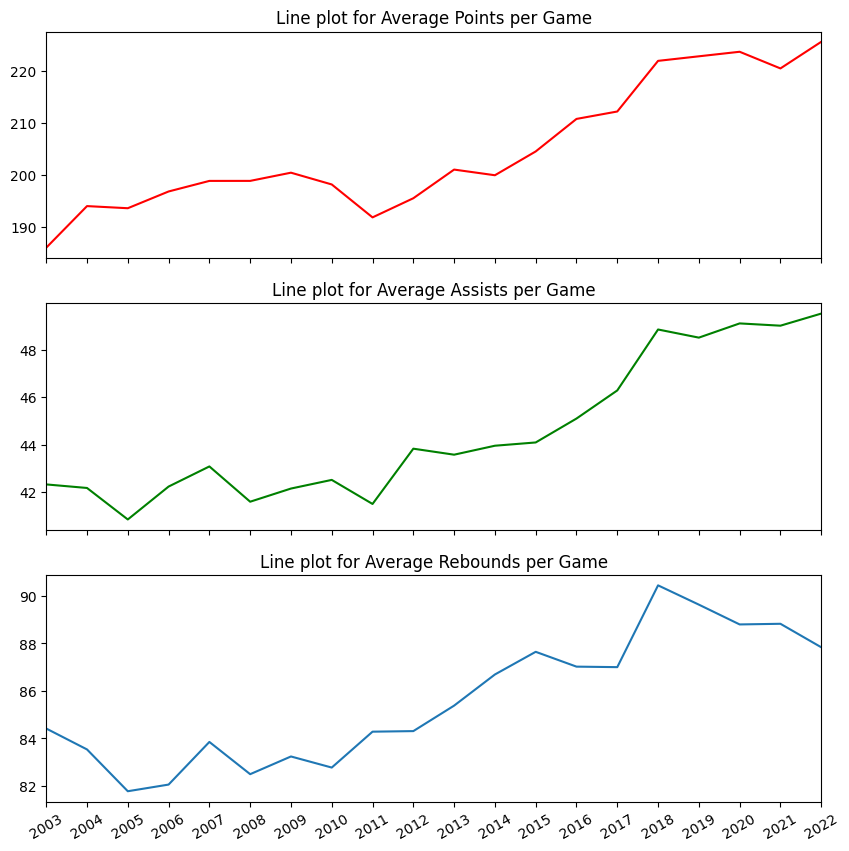

In [55]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10,10))
plt.xlim(2003,2022)
plt.xticks(rotation=30,ticks=AVG_df.index)


axs[0].plot(AVG_df["PTS_AVG"], label="PTS_AVG", color="r")
axs[0].set_title("Line plot for Average Points per Game")

axs[1].plot(AVG_df["AST_AVG"], label="AST_AVG", color="g")
axs[1].set_title("Line plot for Average Assists per Game")

axs[2].plot(AVG_df["REB_AVG"], label="REB_AVG")
axs[2].set_title("Line plot for Average Rebounds per Game")

plt.show()